In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# pipeline: iki modeli ardışık olarak bağlamak için kullanılır

In [69]:
df = pd.read_csv('../datasets/3-customersatisfaction.csv')

In [70]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [71]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [72]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [74]:
df.describe()

,Customer Satisfaction,Incentive
count,100.000000,100.000000
mean,-0.005427,3.445220
std,1.721792,2.911818
min,-2.992863,-1.068081
25%,-1.431357,1.471341
50%,0.109167,2.748839
75%,1.421119,4.739113
max,2.986736,11.000056


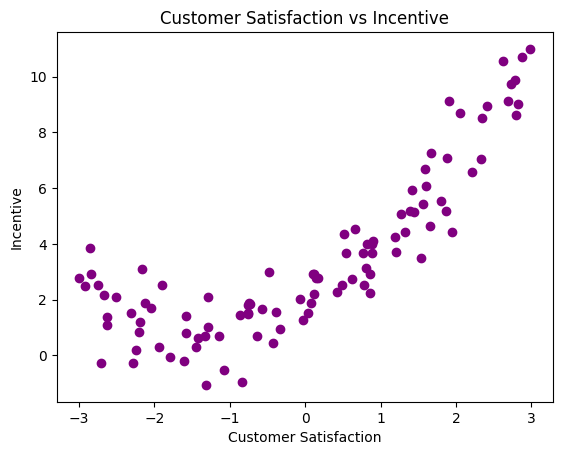

In [75]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], c='purple')
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.title("Customer Satisfaction vs Incentive")
plt.show()

Dependent-independent Features

In [76]:
X = df[["Customer Satisfaction"]]  # Double brackets to keep it as DataFrame
y = df["Incentive"]  # Single brackets for Series

# Alternative approach using .iloc for positional indexing
#X = df.iloc[:, :1]
#y = df.iloc[:, 1]

In [77]:
X.head(), y.head()

(   Customer Satisfaction
 0              -1.282447
 1               0.425298
 2               1.953070
 3               2.625838
 4              -1.426333,
 0     1.010513
 1     2.281043
 2     4.415053
 3    10.563600
 4     0.627365
 Name: Incentive, dtype: float64)

Train-Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

Scaler

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression

In [80]:
linear = LinearRegression()
linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Prediction

In [81]:
y_pred = linear.predict(X_test)

In [82]:
score = r2_score(y_test, y_pred)
print(f"R^2 Score: {score:.4f}") # 0.27 terrible

R^2 Score: 0.2706


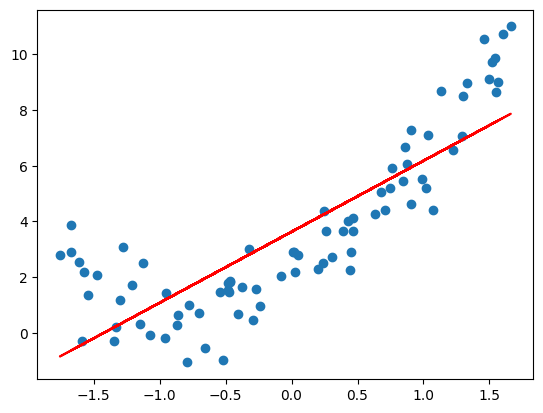

In [83]:
plt.scatter(X_train, y_train)
plt.plot(X_train, linear.predict(X_train), c="red")
plt.show()
# modelin öğrendiği linear ilişki

Polynomial Regression

In [84]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [85]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [86]:
X_train_poly[:5] 
# The first column is all ones (created for bias term)

array([[ 1.        ,  0.24763353,  0.06132237],
       [ 1.        ,  1.45565669,  2.11893639],
       [ 1.        , -0.54018267,  0.29179732],
       [ 1.        , -0.7000392 ,  0.49005488],
       [ 1.        ,  1.56862116,  2.46057233]])

PolynomialFeatures neden bias term (1'ler kolonu) oluşturuyor?

Polynomial regression formülü: y = a₀ + a₁x + a₂x² + ... + aₙxⁿ

- İlk kolon (1'ler): bias term (a₀) için - sabit terim
- İkinci kolon: orijinal x değerleri (a₁x için)  
- Üçüncü kolon: x² değerleri (a₂x² için)

include_bias=True olduğu için bias termi dahil ediliyor.

In [87]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(f"R^2 Score: {score:.4f}") 

R^2 Score: 0.7686


In [89]:
regression.intercept_

np.float64(2.076676429793281)

In [90]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

### Neden Prediction'da `poly`, Plot'ta `X_train` Kullanılıyor?

Bu çok önemli bir nokta:

1.  **Modelin Eğitimi (`.fit`)**: Modelimizi `X_train_poly` ile eğittik. Bu veri `[1, x, x²]` şeklinde **3 sütunludur**. Model bu 3 sütuna göre katsayılar (`.coef_`) öğrenir.

2.  **Modelin Tahmini (`.predict`)**: Model 3 sütunlu veriyle eğitildiği için, tahmin yaparken de ondan **aynı formatta (3 sütunlu)** veri bekler. Bu yüzden `regression.predict(X_train_poly)` kullanmak zorundayız. Eğer `regression.predict(X_train)` deseydik, 1 sütun verdiğimiz için model hata verirdi.

3.  **Grafiğin Çizimi (`.scatter`)**: Bir 2D grafiğin bir x ekseni ve bir y ekseni vardır.
    *   **X Ekseni**: Bizim orijinal değişkenimiz "Customer Satisfaction". Bu değerler tek sütunlu `X_train` içinde.
    *   **Y Ekseni**: "Incentive" değerleri. Bunlar da tek sütunlu `y_train` (gerçek değerler) veya `regression.predict(X_train_poly)` (tahminler) içinde.

**Özetle:** Modelin "beyni" 3 sütunla çalışıyor, ama biz bu 3 sütunun sonucunu orijinal tek sütunlu `X_train`'e karşı grafikte görmek istiyoruz.

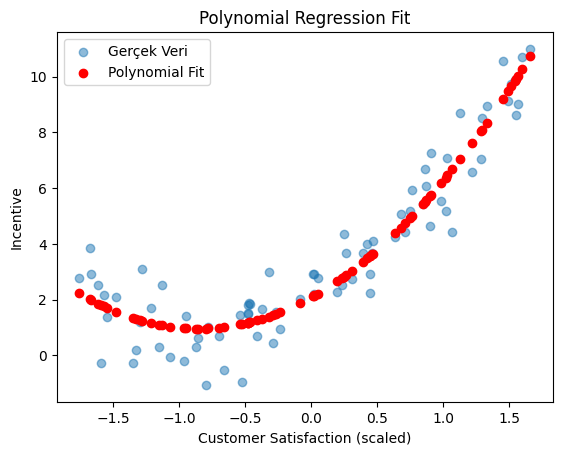

In [91]:
# 1. Gerçek veri noktaları
plt.scatter(X_train, y_train, alpha=0.5, label='Gerçek Veri')

# 2. Modelin öğrendiği polynomial eğriyi çizelim
plt.scatter(X_train, regression.predict(X_train_poly), color='red', label='Polynomial Fit')

plt.xlabel("Customer Satisfaction (scaled)")
plt.ylabel("Incentive")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

New Data 

In [92]:
X_new_data = pd.read_csv('../datasets/3-newdatas.csv')

In [93]:
X_new_data.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [94]:
X_new_data.rename(columns={"0": "Customer Satisfaction"}, inplace=True)

In [95]:
X_new_data.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


Scale and Transform New Data

In [96]:
X_new_data = scaler.transform(X_new_data)

In [97]:
X_new_poly = poly.transform(X_new_data)

In [98]:
y_pred_new = regression.predict(X_new_poly)

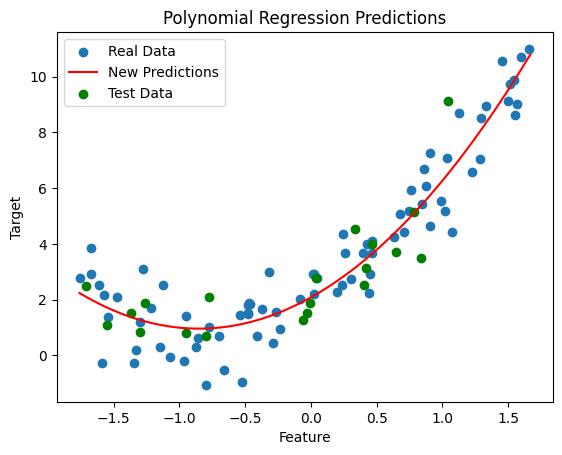

In [99]:
plt.scatter(X_train, y_train, label='Real Data')
plt.plot(X_new_data, y_pred_new, label='New Predictions', color='red')
plt.scatter(X_test, y_test, label='Test Data', color='green')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression Predictions')
plt.legend()
plt.show()

## Pipeline 

In [110]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline(
        steps=[
            ('scaler', scaler),
            ('poly_features', poly_features),
            ('lin_reg', lin_reg)
        ])
    
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"R^2 score for degree {degree}: {score}")


    y_pred_new = pipeline.predict(X_new_data)
    plt.plot(X_new_data, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()

    # pipeline: sequentially apply a list of transformations and a final estimator 


### Why do we use `LinearRegression` with `PolynomialFeatures`?

That's an excellent question, and it gets to the core of how polynomial regression works. The name is a bit tricky, but **Polynomial Regression is actually a special case of Linear Regression.**

Here's the breakdown of what happens inside your `Pipeline`:

1.  **`StandardScaler`**: First, it scales your data (e.g., `X_train`). This is standard practice for many models.

2.  **`PolynomialFeatures(degree)`**: This is the crucial transformation step. It takes your single input feature, let's call it `x`, and creates new features from it by raising it to different powers.
    *   If `degree=3`, it transforms `[x]` into `[1, x, x², x³]`.
    *   Now, instead of one feature, your dataset has multiple features.

3.  **`LinearRegression()`**: This is where the "regression" happens. The linear regression model doesn't know (or care) that the new features (`x`, `x²`, `x³`) came from the same original feature. It treats them as independent features, just like in multiple linear regression.
    *   It tries to find the best coefficients (weights) `w₀, w₁, w₂, w₃` to fit the linear equation:
        `y = w₀*1 + w₁*x + w₂*x² + w₃*x³`

**In short:**

You are not fitting a "curvy" model directly. You are transforming your feature space to be polynomial, and then fitting a simple, straight-line (in a higher dimension) linear model to those new features. The result, when plotted back against the original `x` feature, is a curve.

Özetle, iki adımlı bir iş bölümü vardır:
*   **Polinomal Kısım:** Ham maddeyi (yeni dereceli özellikleri) üretir.
*   **Lineer Kısım:** Bu ham maddeyi kullanarak en iyi denklemi (katsayıları bularak) inşa eder.

R^2 score for degree 1: 0.2705652535622246


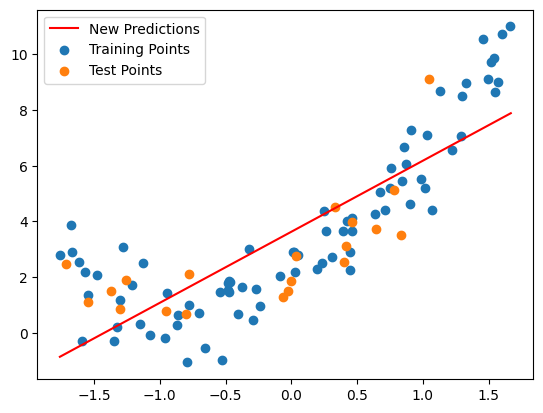

R^2 score for degree 2: 0.7685687698788558


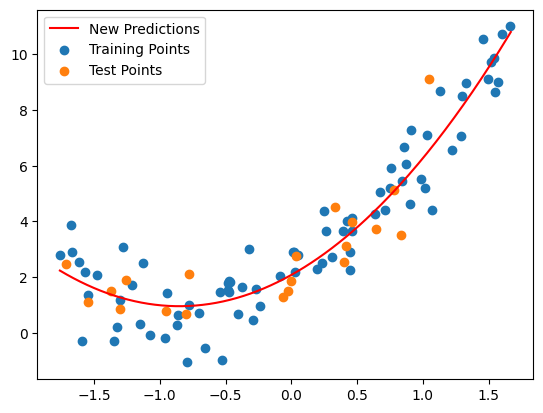

R^2 score for degree 3: 0.7573443621401048


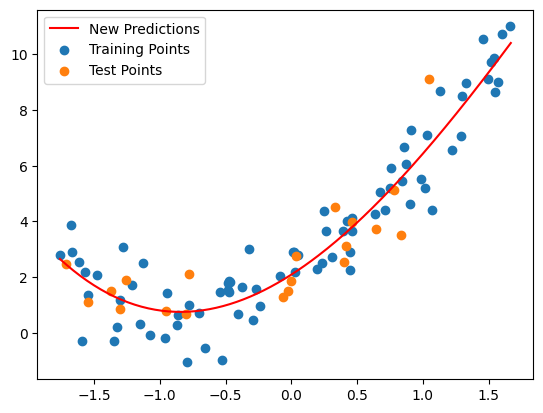

R^2 score for degree 4: 0.7355034443260413


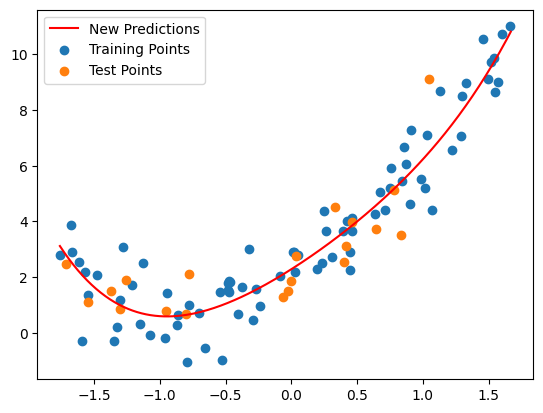

R^2 score for degree 5: 0.7351244165095402


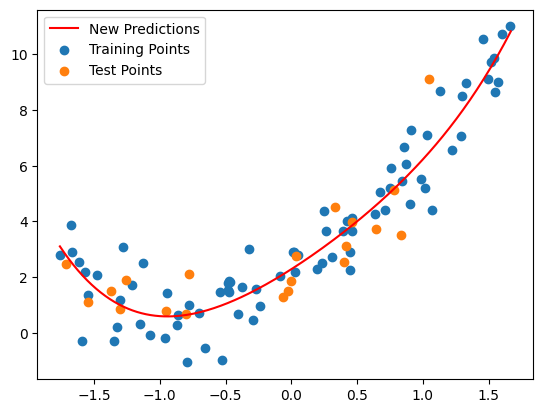

R^2 score for degree 6: 0.734359048213343


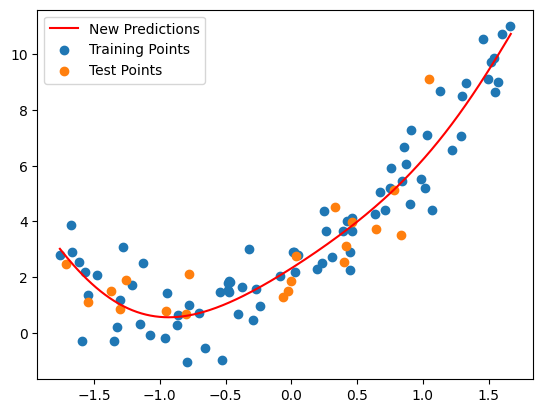

R^2 score for degree 7: 0.7347819263549451


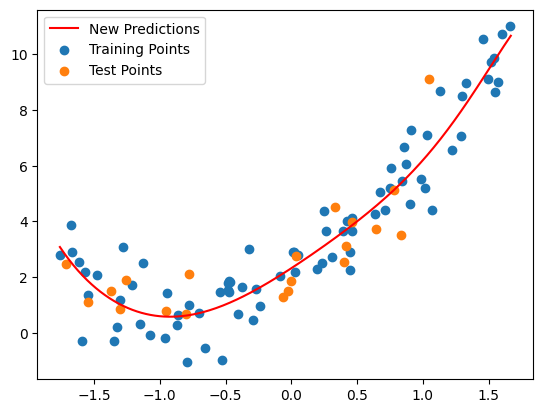

R^2 score for degree 8: 0.7411422099998375


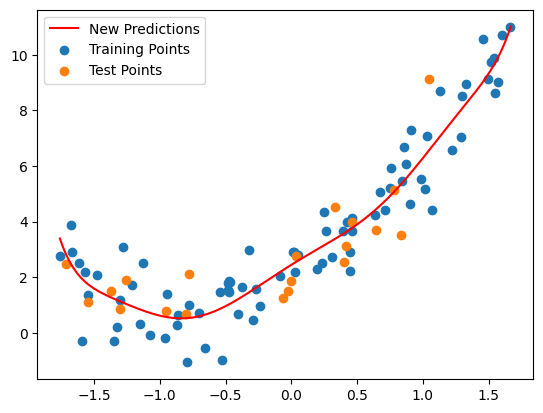

R^2 score for degree 9: 0.7310763879815918


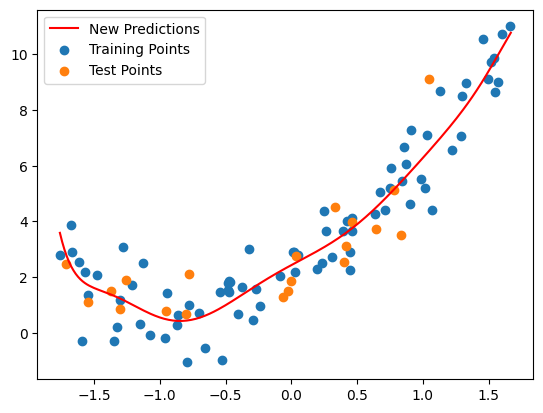

In [112]:
for degree in range(1, 10):
    poly_regression(degree)